In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv("emails.csv")

In [4]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [5]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(df['text'])
y = df['spam']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [8]:
y_pred = model.predict(X_test)

In [9]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.981675392670157


In [11]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       856
           1       0.99      0.94      0.96       290

    accuracy                           0.98      1146
   macro avg       0.98      0.97      0.98      1146
weighted avg       0.98      0.98      0.98      1146



In [12]:
cm = confusion_matrix(y_test, y_pred)

In [13]:
cm

array([[853,   3],
       [ 18, 272]])

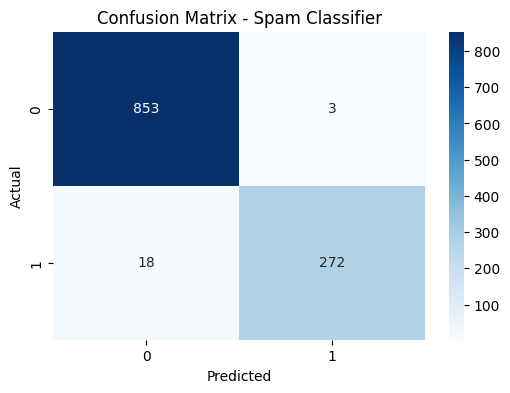

In [14]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Spam Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
